In [2]:
!pip install geopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from geopy.geocoders import Nominatim

Defaulting to user installation because normal site-packages is not writeable


In [5]:
df = pd.read_csv('Flipkart_Data.csv')

In [11]:
print(df.head())

              author       date  rating                            city  \
0      Shivam  kumar  Feb, 2023       5                          Etawah   
1   Kajapriya Kannan  Mar, 2023       5                           Erode   
2          Vipul Rai  Mar, 2023       5                       Champawat   
3  Flipkart Customer  Nov, 2022       5  Mahrajganj Mahrajganj District   
4      BHAWANI SINGH  Feb, 2023       5                         Jodhpur   

           state                  title  \
0  Uttar Pradesh      Terrific purchase   
1     Tamil Nadu    Best in the market!   
2     Uttrakhand                Awesome   
3  Uttar Pradesh    Best in the market!   
4      Rajasthan  Mind-blowing purchase   

                                                text  upvotes  downvotes  \
0        Thanku filipkart best phone in the world ❤️      551         90   
1  Performance is really good and camera quality ...      108         13   
2  Reasons to get it over regular 13\n- 50 percen...      797 

In [7]:
df = df[['author', 'date', 'rating', 'city', 'state', 'title', 'text', 'upvotes', 'downvotes']]

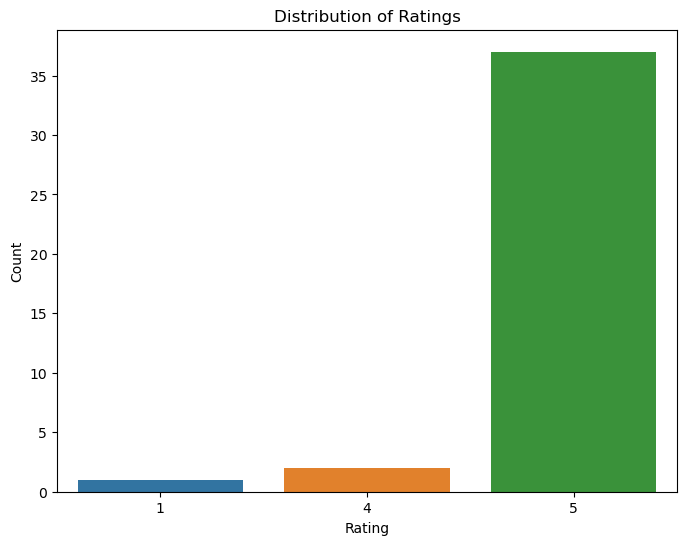

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [9]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['text'].apply(get_sentiment)

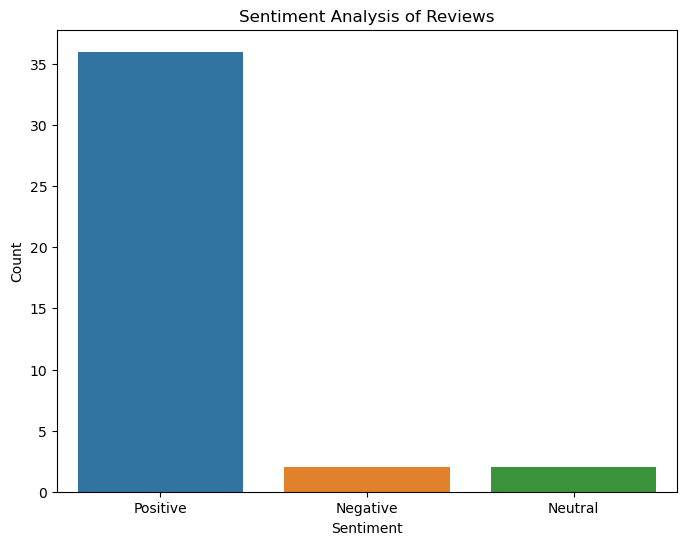

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()